In [ ]:
#check if python is installed
try:
  !python --version
except:
  print("It does not look like python is installed")

Python 3.6.9


Importing Data

mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import from kaggle.json from local to drive
!pip install -q kaggle
from google.colab import files
files.upload()

Saving USvideos.csv to USvideos.csv


In [ ]:
#import modules
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
#from sklearn import tree
from sklearn import metrics 
from sklearn.metrics import explained_variance_score, max_error



#load file
def load_csv(file):
	df = pd.read_csv(file)
	return df


#main
if __name__== "__main__":
  date_file = "USvideos.csv"

df = pd.read_csv("USvideos.csv")

#df = df.iloc[:21000,:]


familiarize myself with the data

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
#Check for null values
null = df.isna().sum()

for key in null.keys():
    if(null[key] > 0):
        print(key,":",null[key])


description : 570


In [ ]:
#turn boolean labels into 1/0
df["comments_disabled"] = df["comments_disabled"].astype(int)
df["ratings_disabled"] = df["ratings_disabled"].astype(int)
df["video_error_or_removed"] = df["video_error_or_removed"].astype(int)

separate dates into respective columns

In [ ]:
#clean publish and date

df['publish_time'] = pd.to_datetime(df["publish_time"], format = '%Y-%m-%d')
df['trending_date'] = pd.to_datetime(df["trending_date"], format = '%y.%d.%m')

In [ ]:
#create new columns
df['td_month'] = df['trending_date'].dt.month
df['td_day'] = df['trending_date'].dt.day
df['td_year'] = df['trending_date'].dt.year
df['p_month'] = df['publish_time'].dt.month
df['p_day'] = df['publish_time'].dt.day
df['p_year'] = df['publish_time'].dt.year

decision tree

In [ ]:
#drop fields that cannot be ran through model or relevant
df = df.drop(['trending_date','video_id', 'title', 'channel_title', 'publish_time', 'tags',
             'thumbnail_link', 'description'], axis = 'columns')

In [ ]:
#test
x = df[['category_id', 'likes', 'dislikes', 'comment_count', 
         'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'td_month',
         'td_day', 'td_year', 'p_month', 'p_day', 'p_year']]
y = df["views"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 33)

In [ ]:
DecisionTree_Class_Model = DecisionTreeRegressor()

In [ ]:
DecisionTree_Class_Model.fit(x_train, y_train)

In [ ]:
y_pred = DecisionTree_Class_Model.predict(x_test)
y_pred

In [ ]:
explained_variance_score(y_test, y_pred)

0.9489252314185966

ValueError: ignored

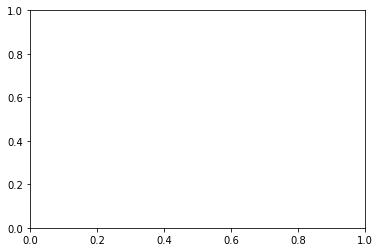

In [ ]:
plt.figure()
plt.scatter(x, y, s = 20, edgecolor = "black", c = "darkorange", label = "data")
plt.plot(x_test, y_pred, color = "cornflowerblue", label = "test", linewidth = 2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

random forest

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 33)

In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
rf_Model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf_Model.predict(x_test)
y_pred

array([1985134, 2316153, 2986770, ...,   25839,  863232, 2400741])

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.0008333333333333334

In [ ]:
!nvidia-smi

other statistical findings

In [ ]:
average views per video

In [ ]:
#average view per trending video
average = sum(df["views"]) / len(df["views"])

print("The average view per trending video is",str(round(average,2)))

The average view per trending video is 2360784.64


In [ ]:
#min max for views
views_lst = []
for views in df["views"]:
  views_lst.append(views)

print(min(views_lst))
print(max(views_lst))

549
225211923


How long does it take for a video to trend

Most common tags

In [ ]:
#find 10 most common tags
from collections import Counter
tag_lst = []

for tags in df["tags"]:
  tag_lst.append(tags)

c = Counter(tag_lst)
c.most_common(10)

  
  


[('[none]', 1535),
 ('ABC|"americanidol"|"idol"|"american idol"|"ryan"|"seacrest"|"ryan seacrest"|"katy"|"perry"|"katy perry"|"luke"|"bryan"|"luke bryan"|"lionel"|"richie"|"lionel richie"|"season 16"|"american idol XVI"|"television"|"ad"|"spring"|"2018"|"music"|"reality"|"competition"|"song"|"sing"|"audition"|"auditions"|"performance"|"live"|"fox"|"AI"|"hollywood"|"contestant"|"official"|"american"|"official american idol"|"hollywood week"|"hometown audition"',
  87),
 ('Jacksfilms|"Jack Douglass"|"YGS"|"YGS 100"|"YGS 50"|"The Best of Your Grammar Sucks"|"Your Grammar Sucks"|"YIAY"|"Yesterday I Asked You"|"Fidget Spinners"|"Emoji Movie"|"Kermit Sings"|"JackAsk"|"Jack Ask"|"Dubstep Solves Everything"|"Frozen 2"|"iPhone Parody"|"Apple Parody"',
  80),
 ('James Corden|"The Late Late Show"|"Colbert"|"late night"|"late night show"|"Stephen Colbert"|"Comedy"|"monologue"|"comedian"|"impressions"|"celebrities"|"carpool"|"karaoke"|"CBS"|"Late Late Show"|"Corden"|"joke"|"jokes"|"funny"|"funny vi

Most Common Category Ids

Cateogry Id List:

2 - Autos & Vehicles
1 -  Film & Animation
10 - Music
15 - Pets & Animals
17 - Sports
18 - Short Movies
19 - Travel & Events
20 - Gaming
21 - Videoblogging
22 - People & Blogs
23 - Comedy
24 - Entertainment
25 - News & Politics
26 - Howto & Style
27 - Education
28 - Science & Technology
29 - Nonprofits & Activism
30 - Movies
31 - Anime/Animation
32 - Action/Adventure
33 - Classics
34 - Comedy
35 - Documentary
36 - Drama
37 - Family
38 - Foreign
39 - Horror
40 - Sci-Fi/Fantasy
41 - Thriller
42 - Shorts
43 - Shows
44 - Trailers

In [ ]:
#category id
category_lst = []
for category in df["category_id"]:
  category_lst.append(category)

c = Counter(category_lst)
c.most_common(10)

Most Common Categories that trend are: Entertainment, Music, Howto & Style, Comedy, People & Blogs

Total Likes:Dislikes

In [ ]:
#likes

likes_lst = []
for likes in df["likes"]:
  likes_lst.append(likes)

likes_total = 0
for l in range(0, len(likes_lst)):
  likes_total = likes_total + likes_lst[l]

print(likes_total)

#dislikes

dislikes_lst = []
for dislikes in df['dislikes']:
  dislikes_lst.append(dislikes)

dislikes_total = 0
for d in range(0, len(dislikes_lst)):
  dislikes_total = dislikes_total + dislikes_lst[d]

print(dislikes_total)

#ratio

print("Total likes to dislikes ratio is 20:1 or",likes_total/dislikes_total)

3041147198
151978155
Total likes to dislikes ratio is 20:1 or 20.010423195359884


In [ ]:
#ratings disabled

df["ratings_disabled"].value_counts()



In [ ]:
#comments_disabled count
df["comments_disabled"].value_counts()

In [ ]:
#percentages
ratingsdisabled = 40780/40948
commentsdisabled = 40316/40948

print(ratingsdisabled)
print(commentsdisabled)

descriptions that are empty

In [ ]:

570/40948




checking if certain channels are more likely to trend

In [ ]:
#channel count
channel_lst = []

for channel in df["channel_title"]:
  channel_lst.append(channel)

c = Counter(channel_lst)
c.most_common(10)

checking text within titles to see if there are bias words

In [ ]:
title_lst = []

for i in df["title"]:
  title_lst.append(i)

c = Counter(title_lst)
c.most_common(20)

In [ ]:

print("The average trending video takes 28 days to trend therfore on average a video would need to have", 2000000/28, "views per day")

The average trending video takes 28 days to trend therfore on average a video would need to have 71428.57142857143 views per day


average criterions for a trending video:

2+ million views

28 days to trend

Besides "None" enterainment, famous people, and comedy are the most popular tags

Most Common Categories that trend are: Entertainment, Music, Howto & Style, Comedy, People & Blogs

20:1 likes to dislikes ratio

certain channels such as ESPN, The Tonight Show Starring Jimmy Fallon, and Vox are more likely/consitently reach the trending section

Almost all videos that trend enable comments and ratings(likes/dislikes)



Create filters to go through records in datasheet to find videos that are within a set criterion

In [ ]:
def video_predictor(num):
  
